## Import the packages and the dataset

In [ ]:
#%pip install mlxtend

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

# Read the USA_Housing dataset into a pandas DataFrame object
df = pd.read_csv("USA_Housing.csv")


In [49]:
df.iloc[:100]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
95,73698.696357,6.372731,6.578352,4.33,51815.096419,1.840236e+06,"69600 Wilson Rue\nElizabethland, PW 17767-2884"
96,66263.910501,6.374930,6.736974,4.41,49829.951500,1.441422e+06,"001 Steve Plaza\nJessicastad, UT 25190"
97,75394.759582,6.933352,7.834100,4.48,22268.075306,1.498641e+06,"238 Anthony Drive\nAcostahaven, AS 62753-6637"
98,65984.750645,6.512270,6.316480,2.38,21867.476940,9.547466e+05,"01818 Wilson Spurs\nWest Andreaton, SD 69568-7005"


## Basic Information of the Dataset

In [50]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [51]:
df.describe() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Data Visulization

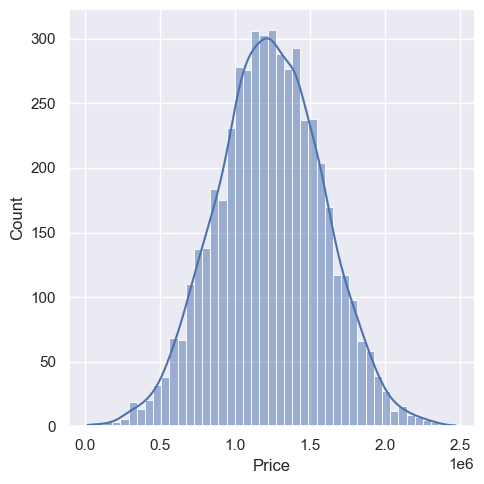

In [52]:
sns.displot(df['Price'], kde=True)

<Axes: >

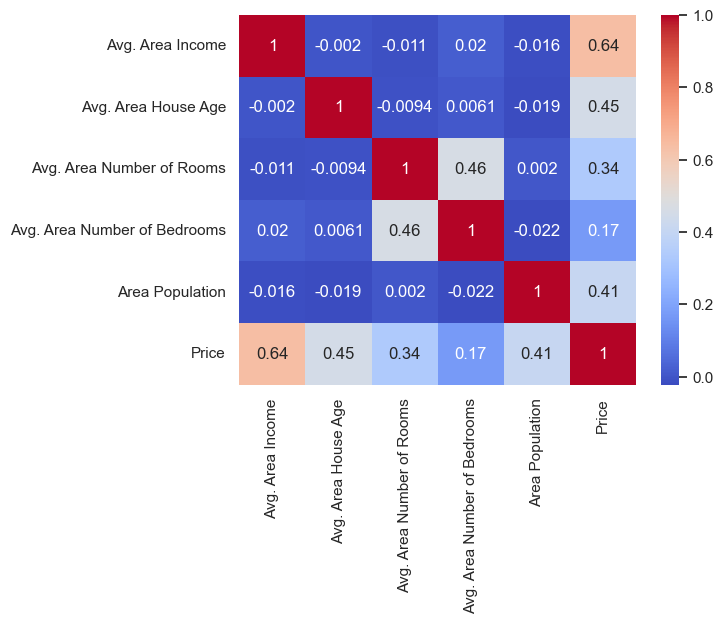

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Pick two features

In [64]:
X=df[['Avg. Area Number of Rooms', 'Avg. Area House Age']]
y=df['Price']

In [65]:
X = df[['Avg. Area Number of Rooms', 'Avg. Area House Age']].values
y = df['Price'].values

# Convert targets to binary for the purpose of demonstration
y= np.where(y > y.mean(), 1, -1)


In [66]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [68]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 1_000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

In [69]:
# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[False  True False ... False False  True]


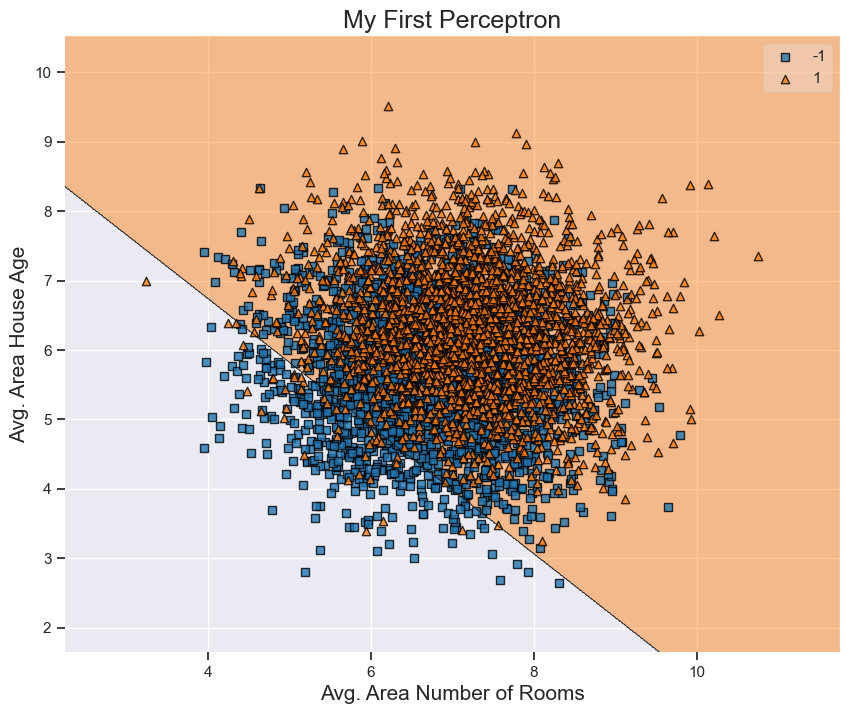

In [70]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Avg. Area Number of Rooms", fontsize = 15)
plt.ylabel("Avg. Area House Age", fontsize = 15)
plt.show()

## Error Analysis

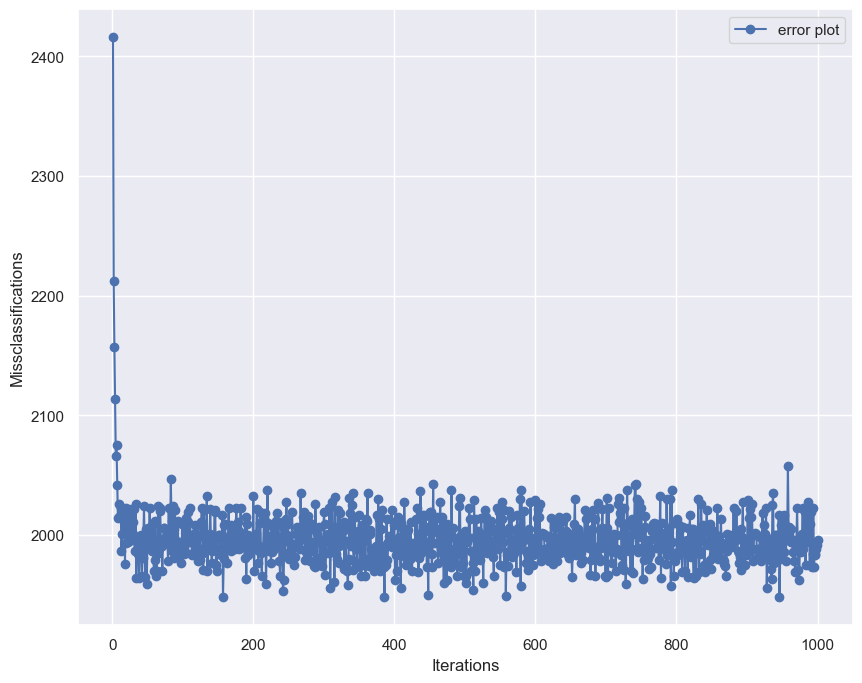

In [71]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

## Conclusion
While maintaining all other features unchanged, these two particular features exhibit linearity up to a certain point. However, we cannot effectively partition the dataset based solely on these two features.